# Homework 03


## Part 1 - Questions

### Question 1: 

Which demographic of people (race/religion/sexual orientation) is the victim of the most hate crimes in NYC?

* Who (population): NYC population
* What (subject, discipline): criminology
* Where (location): NYC 
* When (snapshot, longitudinal): October 2020-February 2023
* How much data do you need to do the analysis/work: Dataset containing at least 1,000 hate crimes

### Question N: 

TODO (write the question)

* Who (population): TODO
* What (subject, discipline): TODO
* Where (location): TODO
* When (snapshot, longitudinal): TODO
* How much data do you need to do the analysis/work: TODO

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

The police department or NYC Open Data might collect relevant data

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: NYPD Hate Crimes
2. Link to Data: https://data.cityofnewyork.us/Public-Safety/NYPD-Hate-Crimes/bqiq-cu78
3. Source / Origin: 
	* Author or Creator: Police Department (NYPD)
	* Publication Date: October 29 2020 (updated February 1 2023)
	* Publisher: NYC OpenData
	* Version or Data Accessed: 2/14/2023
4. License: (TODO name of license)
5. Can You Use this Data Set for Your Intended Use Case? (TODO answer this question)

## Format




### Overview

* Format: csv
* Size: 334 KB
* Number of Records: 1971



### Sample of Data




In [3]:
# TODO show a few lines of data from the actual file

with open('NYPD_Hate_Crimes.csv', 'r') as file:
    header = file.readline()
    print(header.strip())
    
    for i in range(5):
        line = file.readline()
        print(line.strip())


Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
201904812231317,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
202004412397317,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,03/28/2020,B32682490
202004412397317,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color,03/28/2020,B32682492
202004512477317,2020,7,07/18/2020,45,PATROL BORO BRONX,BRONX,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-BLACK,Race/Color,11/10/2020,B32701468
202105012236217,2021,4,04/25/2021,50,PATROL BORO BRONX,BRONX,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIM

In [5]:
import csv

with open('NYPD_Hate_Crimes.csv') as file:
    reader = csv.reader(file)
    header = next(reader)
    
    field_info = []
    
    for field in header:
        potential_types = set()
        
        for i in range(5):
            row = next(reader)
            value = row[header.index(field)]
            value_type = type(value).__name__
            potential_types.add(value_type)
        
        if 'float' in potential_types:
            field_type = float
        elif 'int' in potential_types:
            field_type = int
        elif 'str' in potential_types:
            field_type = str
        
        field_info.append((field, field_type))
    
    for field, field_type in field_info:
        print(f"Field/Column {header.index(field) + 1}: {field} ({field_type.__name__})")


Field/Column 1: Full Complaint ID (str)
Field/Column 2: Complaint Year Number (str)
Field/Column 3: Month Number (str)
Field/Column 4: Record Create Date (str)
Field/Column 5: Complaint Precinct Code (str)
Field/Column 6: Patrol Borough Name (str)
Field/Column 7: County (str)
Field/Column 8: Law Code Category Description (str)
Field/Column 9: Offense Description (str)
Field/Column 10: PD Code Description (str)
Field/Column 11: Bias Motive Description (str)
Field/Column 12: Offense Category (str)
Field/Column 13: Arrest Date (str)
Field/Column 14: Arrest Id (str)



### Fields or Column Headers

Field/Column 1: Full Complaint ID (str)
Field/Column 2: Complaint Year Number (str)
Field/Column 3: Month Number (str)
Field/Column 4: Record Create Date (str)
Field/Column 5: Complaint Precinct Code (str)
Field/Column 6: Patrol Borough Name (str)
Field/Column 7: County (str)
Field/Column 8: Law Code Category Description (str)
Field/Column 9: Offense Description (str)
Field/Column 10: PD Code Description (str)
Field/Column 11: Bias Motive Description (str)
Field/Column 12: Offense Category (str)
Field/Column 13: Arrest Date (str)
Field/Column 14: Arrest Id (str)

## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset
* 'Bias-Motivation' column will be used to identify hate crimes aginst specific demographics
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
* To convert the data in these columns into analogous Python types, we can use the built-in str type, since all of these columns contain text data. We don't need to perform any additional data cleaning, since the data in these columns is already in a consistent format
* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform
* will need to obtain the data to get the year in which the most hate crimes against a minority was committed by storing the year number as an integer


In [16]:
import csv

filename = 'NYPD_Hate_Crimes.csv'

bias_counts = {}
year_borough_counts = {}

with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        bias_motivation = row['Bias Motive Description']
        if bias_motivation in bias_counts:
            bias_counts[bias_motivation] += 1
        else:
            bias_counts[bias_motivation] = 1

max_count = 0
max_bias_motivation = ''
for bias_motivation, count in bias_counts.items():
    if count > max_count:
        max_count = count
        max_bias_motivation = bias_motivation

max_year = ''
max_borough = ''
max_count_by_year_borough = 0
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Bias Motive Description'] == max_bias_motivation:
            year = row['Complaint Year Number']
            borough = row['Patrol Borough Name']
            count = 1
            if (year, borough) in year_borough_counts:
                count += year_borough_counts[(year, borough)]
            year_borough_counts[(year, borough)] = count
            if count > max_count_by_year_borough:
                max_count_by_year_borough = count
                max_year = year
                max_borough = borough

print(f'The demographic of people with the most hate crimes in NYC are {max_bias_motivation} with a count of {max_count}')
print(f'The year and patrol borough with the highest count of {max_bias_motivation} crimes in {max_borough} is {max_year} with a count of {max_count_by_year_borough}')



The demographic of people with the most hate crimes in NYC are ANTI-JEWISH with a count of 866
The year with the highest count of ANTI-JEWISH crimes in PATROL BORO BKLYN SOUTH is 2019 with a count of 71


## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [26]:

import numpy as np
import csv
import statistics


filename = 'NYPD_Hate_Crimes.csv'
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    years = []
    for row in reader:
        year = int(row['Complaint Year Number'])
        years.append(year)

num_records = len(years)
minimum = np.min(years)
maximum = np.max(years)
mean = np.mean(years)
median = np.median(years)
mode = float(np.nan)
if len(years) > 0:
    mode = float(np.array(stats.mode(years)))
variance = np.var(years)



print(f'Mean: {mean}')



Mean: 2020.7397260273972


#### Dispersion

In [4]:
# TODO: copy and paste your results here
print(f'Variance: {variance}')

#### Outliers


In [5]:
# TODO: copy and paste your results here
print(f'Minimum: {minimum}')
print(f'Maximum: {maximum}')

#### Other


In [24]:
# TODO: copy and paste your results here
print(f'Number of records: {num_records}')
print(f'Median: {median}')
print(f'Mode: {mode}')


Number of records: 1971
Minimum: 2019
Maximum: 2022
Median: 2021.0
Mode: 2022.0


###  Analysis on Categorical Data

#### Frequency

In [28]:
# TODO: copy and paste your results here
import csv

with open('NYPD_Hate_Crimes.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    next(reader)
    

    bias_counts = {}
    
    for row in reader:

        bias = row[10]
        
        if bias in bias_counts:
            bias_counts[bias] += 1
        else:
            bias_counts[bias] = 1


for bias, count in bias_counts.items():
    print(f'{bias}: {count}')


ANTI-WHITE: 71
ANTI-ASIAN: 275
ANTI-BLACK: 169
ANTI-JEWISH: 866
ANTI-FEMALE HOMOSEXUAL (LESBIAN): 29
ANTI-MALE HOMOSEXUAL (GAY): 241
ANTI-TRANSGENDER: 51
ANTI-FEMALE: 14
ANTI-OTHER ETHNICITY: 76
ANTI-MUSLIM: 52
ANTI-ARAB: 7
ANTI-CATHOLIC: 36
ANTI-HISPANIC: 36
ANTI-GENDER NON-CONFORMING: 6
ANTI-EASTERN ORTHODOX: 2
ANTI-LGBT (MIXED GROUP): 11
ANTI-OTHER RELIGION: 5
60 YRS AND OLDER: 1
ANTI-HINDU: 6
ANTI-JEHOVAHS WITNESS: 2
ANTI-PHYSICAL DISABILITY: 1
ANTI-SIKH: 4
ANTI-MULTI-RACIAL GROUPS: 3
ANTI-RELIGIOUS PRACTICE GENERALLY: 3
ANTI-BUDDHIST: 3
ANTI-PROTESTANT: 1


#### Unique Values

In [34]:
# TODO: copy and paste your results here
for bias, count in bias_counts.items():
    print(f'{bias}')

ANTI-WHITE
ANTI-ASIAN
ANTI-BLACK
ANTI-JEWISH
ANTI-FEMALE HOMOSEXUAL (LESBIAN)
ANTI-MALE HOMOSEXUAL (GAY)
ANTI-TRANSGENDER
ANTI-FEMALE
ANTI-OTHER ETHNICITY
ANTI-MUSLIM
ANTI-ARAB
ANTI-CATHOLIC
ANTI-HISPANIC
ANTI-GENDER NON-CONFORMING
ANTI-EASTERN ORTHODOX
ANTI-LGBT (MIXED GROUP)
ANTI-OTHER RELIGION
60 YRS AND OLDER
ANTI-HINDU
ANTI-JEHOVAHS WITNESS
ANTI-PHYSICAL DISABILITY
ANTI-SIKH
ANTI-MULTI-RACIAL GROUPS
ANTI-RELIGIOUS PRACTICE GENERALLY
ANTI-BUDDHIST
ANTI-PROTESTANT


## Part 5 - Visualizations



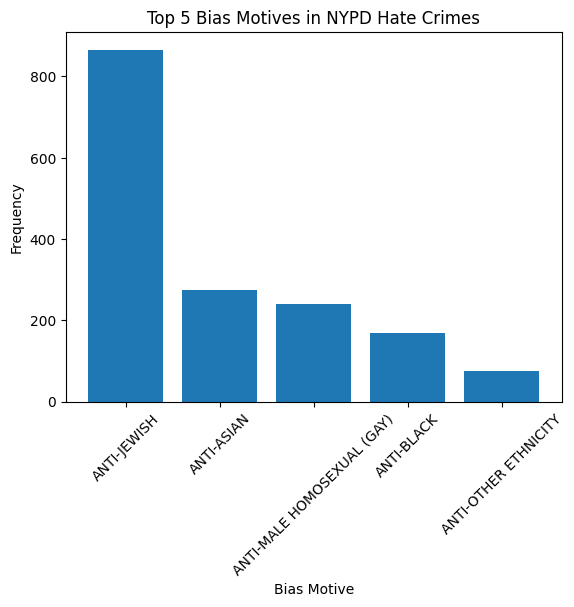

In [40]:
import csv
import matplotlib.pyplot as plt

with open('NYPD_Hate_Crimes.csv', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader) 
    bias_counts = {}
    for row in reader:
        bias_motive = row[10]
        if bias_motive not in bias_counts:
            bias_counts[bias_motive] = 1
        else:
            bias_counts[bias_motive] += 1


top5_bias = sorted(bias_counts.items(), key=lambda x: x[1], reverse=True)[:5]
bias_labels = [bias[0] for bias in top5_bias]
bias_freqs = [bias[1] for bias in top5_bias]

plt.bar(bias_labels, bias_freqs)
plt.title('Top 5 Bias Motives in NYPD Hate Crimes')
plt.xlabel('Bias Motive')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The most discriminated against group in NYC are Jews, coming in at second and third are Asians and Homosexual men

## Part 6 - Conclusion

I think my question was a little too easy to answer, as all it needed was a simple counter. The conclusion is that the highest amount of hate crimes in NYC was committed against Jewish people, and that the borough it occured most in was Brooklyn in the year 2019